# U5: Ejemplo de ritmo cardiaco

## introduccion

##### A lo largo de esta practica, abordaremos desafíos de programación y análisis de datos, proporcionando soluciones y explicaciones para diversos errores y métodos en Python. desde la corrección de errores en la manipulación de archivos y directorios hasta técnicas avanzadas de análisis de datos y audio, incluyendo la evaluación de modelos de aprendizaje automático mediante métricas específicas y la visualización de resultados. Sera una inmersión profunda en la resolución de problemas prácticos y conceptos teóricos en el ámbito de la ciencia de datos y el procesamiento de señales.

##### Este fragmento de código está preparando el entorno para un análisis de datos y aprendizaje automático completo, especialmente centrado en el procesamiento de señales de audio. Importa librerías para el manejo de datos, procesamiento de audio, visualización de datos y una amplia gama de técnicas y modelos de aprendizaje automático. Además, configura el entorno para suprimir advertencias que podrían ser irrelevantes o molestas para el usuario, permitiendo así un flujo de trabajo más limpio y centrado.

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyhrv.time_domain as td
import scipy.io
import scipy.io.wavfile
import seaborn as sns
import sklearn
import sys
import unicodedata
import warnings
from IPython.display import Audio
from pydub import AudioSegment
from mlxtend.classifier import StackingCVClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold, StratifiedShuffleSplit, cross_val_predict, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


# Configuración de advertencias
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


c:\Users\juanm\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### El código está diseñado para procesar archivos de datos fisiológicos almacenados en directorios dentro de un directorio base llamado 'Evidencias'. Omite los directorios que comienzan con "Videos" o "Audios" y procesa archivos de texto que se espera tengan el mismo nombre que su directorio contenedor (pero en mayúsculas). Los datos de cada archivo de texto se leen en un DataFrame de Pandas, que luego se almacena en un diccionario, utilizando el nombre del directorio (en mayúsculas) como clave.

In [2]:
path = './Evidencias/'
list_dir = os.listdir(path=path)
fisiological_data = {}
for dir in list_dir:
    if dir.startswith("Videos") or dir.startswith("Audios"):
        continue
    file = dir.upper()
    fisiological_data[file] = pd.read_csv(path + dir +"/"+ file + ".txt", header=None, names=["intervalRR"])

## Procesamiento de Datos

#### Analisis exploratorio

##### La función milisegundos_a_timestamp convierte un valor de milisegundos a una cadena de texto que representa el tiempo en el formato HH:MM:SS.mmm. Esto se logra convirtiendo los milisegundos a segundos totales, separando estos segundos totales en horas, minutos y segundos, y manteniendo los milisegundos restantes. Finalmente, estos componentes se formatean y combinan en una cadena que representa la marca de tiempo.

In [3]:
def milisegundos_a_timestamp(milisegundos):
    # Convertir milisegundos a segundos
    segundos_totales = int(milisegundos // 1000)
    milisegundos_restantes = int(milisegundos % 1000)  # Convertir a entero para asegurar el formato correcto
    horas = int(segundos_totales // 3600)
    minutos = int((segundos_totales % 3600) // 60)
    segundos = int(segundos_totales % 60)
    # Formatear como HH:MM:SS.mmm donde 'mmm' son los milisegundos
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}.{milisegundos_restantes:03d}"


##### La instrucción RAVD = './Evidencias/Audios/' en Python asigna una ruta de directorio relativa a una variable llamada RAVD. Esta variable puede ser utilizada posteriormente en el código para referenciar el directorio Audios dentro de la carpeta Evidencias, que se encuentra en el directorio actual desde el cual se ejecuta el script. Este tipo de asignaciones es común en los programas para definir rutas de acceso a archivos o directorios que serán utilizados más adelante en el código, por ejemplo, para leer, escribir o manipular archivos.

In [4]:
RAVD = './Evidencias/Audios/'

##### El código proporciona una estructura para listar y procesar de manera segura el contenido de un directorio en Python, manejando adecuadamente la situación donde la ruta proporcionada no es un directorio. Utiliza un enfoque defensivo para evitar que el programa se detenga inesperadamente debido a errores, mejorando así su robustez y usabilidad.

In [5]:
try:
    dir_list = os.listdir(RAVD)
    dir_list.sort()

    # Continúa con tu lógica aquí
    # Por ejemplo, procesar los elementos en dir_list
    for item in dir_list:
        print(item)

except NotADirectoryError:
    print(f"Error: '{RAVD}' no es un directorio válido.")
    
    

ANDRÉS.mp3
ARIANA.mp4
DAFNE.mp3
JESÚS.mp3
JUAN.mp3
RACHEL.mp3
SCARLETT.mp3


##### Resumen: El código define una función útil para eliminar acentos de caracteres en palabras, utilizando la normalización Unicode y filtrando caracteres por categoría. Luego, demuestra el uso de esta función en una lista de palabras con acentos, resultando en la impresión de estas palabras sin acentos. Esto puede ser particularmente útil en tareas de procesamiento de texto donde la uniformidad y la comparación de cadenas sin considerar acentos es deseable.

In [6]:

def quitar_acentos(palabra):
    palabra_normalizada = unicodedata.normalize('NFD', palabra)
    palabra_sin_acentos = ''.join(c for c in palabra_normalizada if unicodedata.category(c) != 'Mn')
    return palabra_sin_acentos

# Lista de palabras con acentos
palabras_con_acentos = ["JESÚS", "ANDRÉS"]

# Iterar sobre la lista de palabras para quitar los acentos
palabras_sin_acentos = [quitar_acentos(palabra) for palabra in palabras_con_acentos]

# Imprimir las palabras sin acentos
for palabra_sin_acentos in palabras_sin_acentos:
    print(palabra_sin_acentos)


JESUS
ANDRES


##### El código procesa un conjunto de datos fisiológicos representados por un diccionario (fisiological_data), donde cada elemento corresponde a los datos de un sujeto específico. Para cada sujeto, calcula las marcas de tiempo acumulativas a partir de los intervalos RR indicados en sus datos. Estas marcas de tiempo reflejan el tiempo transcurrido desde el inicio de la grabación. Una vez calculadas, las marcas de tiempo se añaden como una nueva columna al DataFrame correspondiente a cada sujeto. Este proceso permite transformar los intervalos RR en marcas de tiempo más comprensibles y facilita el análisis temporal de los datos fisiológicos.

##### El código lee un archivo de texto llamado RACHEL.txt, ubicado en la carpeta RACHEL dentro de Evidencias. Al no tener una fila de encabezados, se asigna manualmente el nombre Datos a la única columna del DataFrame resultante.

In [7]:
df = pd.read_csv('./Evidencias/JUAN/JUAN.txt', header=None, names=['Datos'])

##### El código prepara y muestra una gráfica de línea simple utilizando matplotlib. El eje X de la gráfica se basa en los índices del DataFrame df, mientras que el eje Y utiliza los valores de la columna 'Datos'. La gráfica está etiquetada adecuadamente con títulos para ambos ejes y un título general para la gráfica, lo que facilita su comprensión.

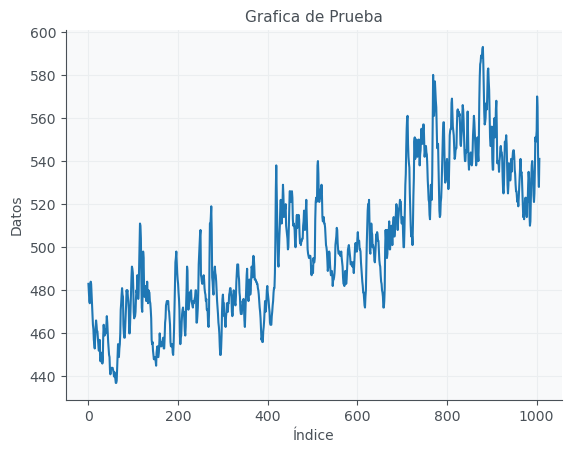

In [8]:
plt.plot(df.index, df['Datos'])
plt.xlabel('Índice')
plt.ylabel('Datos')
plt.title('Grafica de Prueba')
plt.show()

## Exploratory analysis

##### El código crea un gráfico de violín de 14x10 pulgadas que muestra la distribución de los valores de 'intervalRR' para diferentes sujetos en un DataFrame llamado combined_df. Cada violín representa la distribución de 'intervalRR' para un sujeto, permitiendo comparar visualmente la variabilidad y la distribución de los intervalos RR entre los sujetos. Los violines se cortan exactamente en los valores máximos y mínimos de los datos, y las etiquetas del eje X están rotadas para facilitar la lectura.

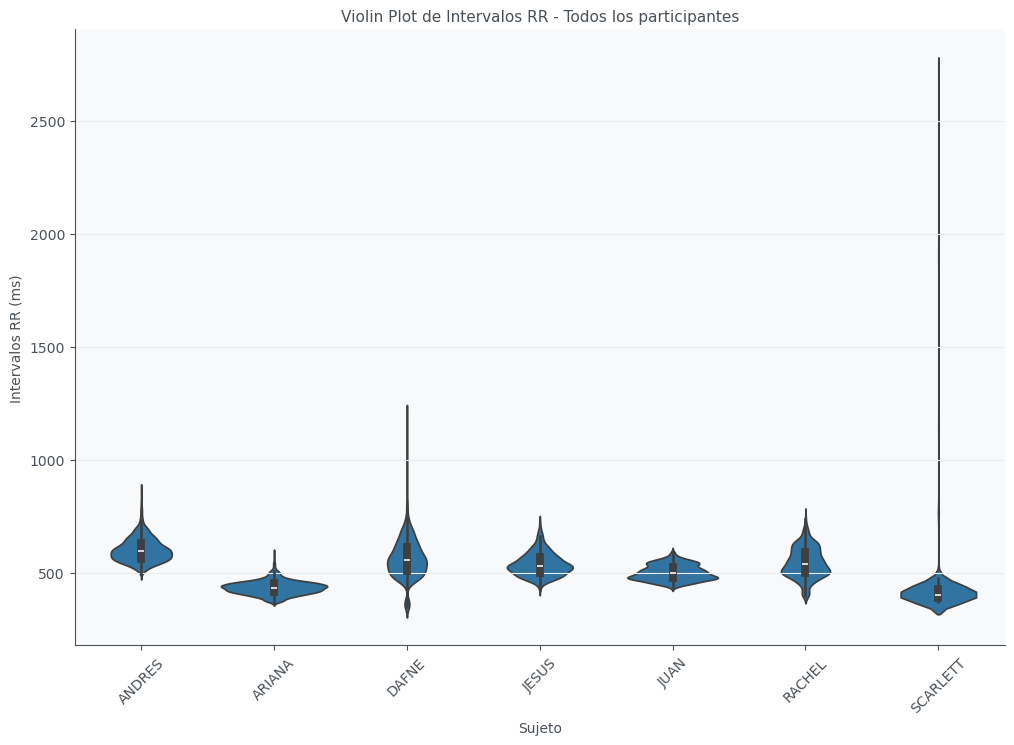

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que fisiological_data es tu diccionario de DataFrames

# Crear una lista para almacenar los DataFrames de cada sujeto
dfs = []

# Iterar sobre cada sujeto en el diccionario fisiological_data
for subject, df in fisiological_data.items():
    # Agregar una nueva columna para identificar el sujeto en cada DataFrame
    df['Sujeto'] = subject
    # Agregar el DataFrame modificado a la lista
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dfs, ignore_index=True)

# Graficar un gráfico de violín combinado para todos los participantes
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_df, x='Sujeto', y='intervalRR')
plt.title('Violin Plot de Intervalos RR - Todos los participantes')
plt.xlabel('Sujeto')
plt.ylabel('Intervalos RR (ms)')
plt.xticks(rotation=45)
plt.show()

##### El código genera un gráfico de dispersión detallado que muestra los intervalos RR de diferentes sujetos. Cada sujeto se representa con puntos únicos en el gráfico, diferenciados por color y estilo, lo que facilita la visualización y comparación de sus intervalos RR. Las etiquetas claras y el título proporcionan un contexto adecuado, y la rotación de las etiquetas del eje X mejora la legibilidad.

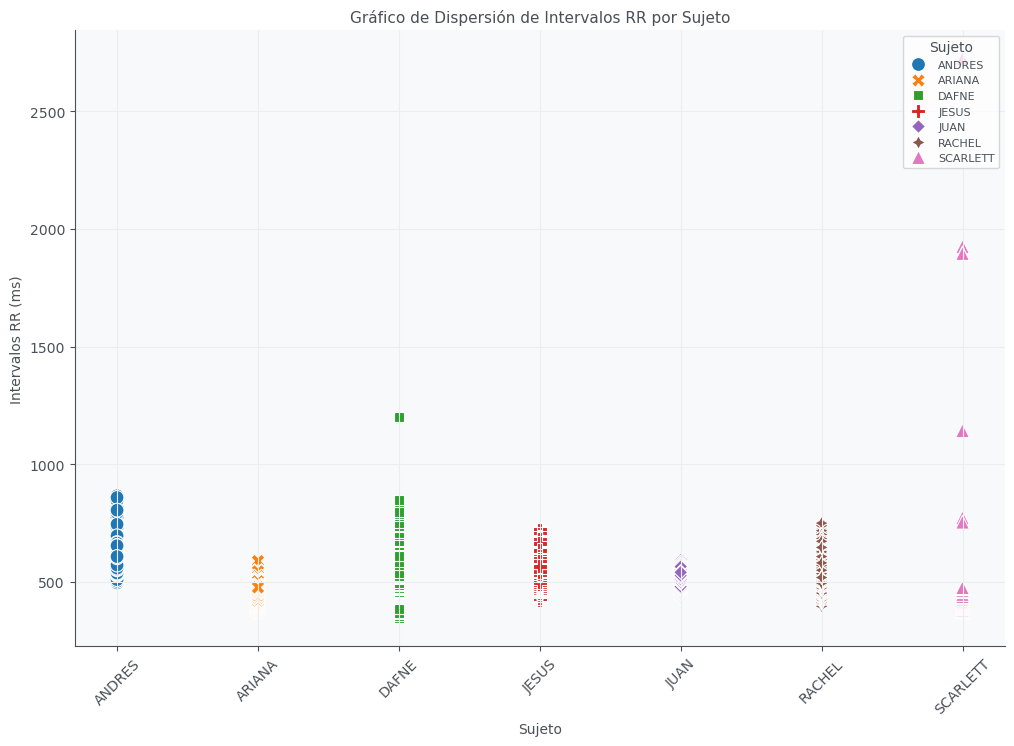

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, x='Sujeto', y='intervalRR', hue='Sujeto', style='Sujeto', s=100)
plt.title('Gráfico de Dispersión de Intervalos RR por Sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Intervalos RR (ms)')
plt.xticks(rotation=45)
plt.show()


In [11]:
df.describe()

,intervalRR
count,1152.000000
mean,418.614583
std,113.315391
min,372.000000
25%,388.000000
50%,403.000000
75%,430.000000
max,2725.000000


##### El código crea un histograma apilado de los intervalos RR agrupados por sujeto, usando un DataFrame llamado combined_df. Cada sujeto se representa en una pila con un color distinto, facilitando la comparación visual de las distribuciones de los intervalos RR entre diferentes sujetos. El gráfico se configura con títulos y etiquetas para mejorar su legibilidad y se muestra con un tamaño de 12x8 pulgadas.

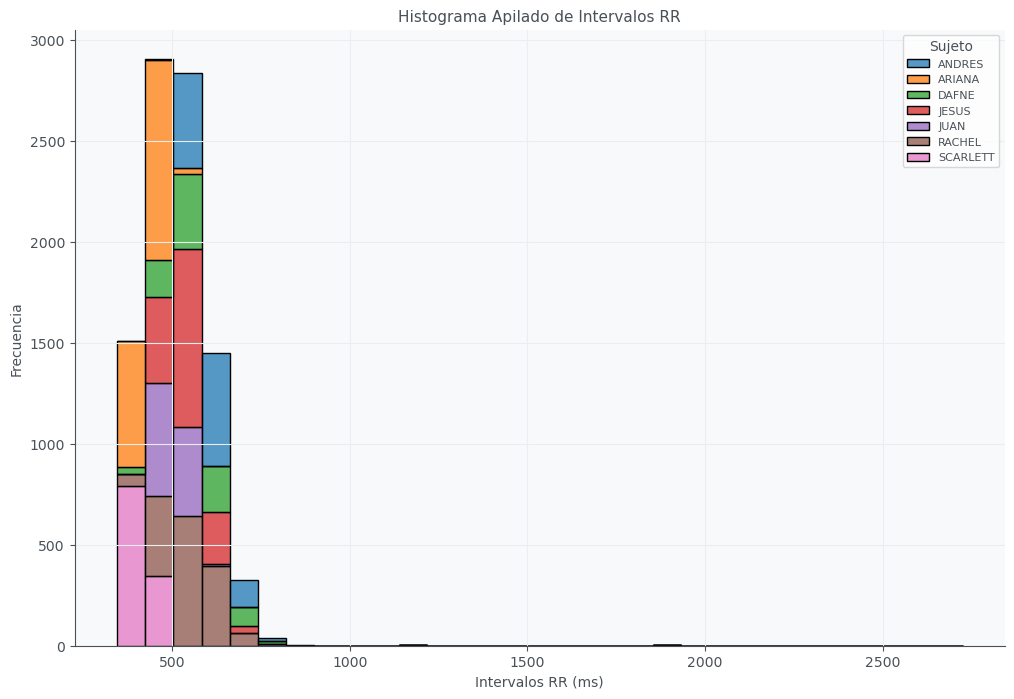

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=combined_df, x='intervalRR', hue='Sujeto', multiple='stack', palette='tab10', bins=30)
plt.title('Histograma Apilado de Intervalos RR')
plt.xlabel('Intervalos RR (ms)')
plt.ylabel('Frecuencia')
plt.show()


## Segmentacion

##### La función milisegundos_a_timestamp toma un valor de milisegundos, lo descompone en horas, minutos, segundos y milisegundos, y luego los combina en un string formateado que representa la marca de tiempo en un formato legible y estandarizado. Esta función es útil para convertir duraciones o tiempos almacenados en milisegundos a un formato más comprensible para los seres humanos.

In [13]:
def milisegundos_a_timestamp(milisegundos):
    # Convertir milisegundos a segundos
    segundos_totales = int(milisegundos // 1000)
    milisegundos_restantes = int(milisegundos % 1000)  # Convertir a entero para asegurar el formato correcto
    horas = int(segundos_totales // 3600)
    minutos = int((segundos_totales % 3600) // 60)
    segundos = int(segundos_totales % 60)
    # Formatear como HH:MM:SS.mmm donde 'mmm' son los milisegundos
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}.{milisegundos_restantes:03d}"

#####  Este código procesa datos fisiológicos organizados por sujetos, calculando un timestamp para cada registro basado en la suma acumulada de los intervalos RR. Esto implica convertir los intervalos de tiempo (presumiblemente en milisegundos) en timestamps legibles, que luego se agregan como una nueva columna en el conjunto de datos de cada sujeto. El uso de timestamps puede facilitar la interpretación temporal de los datos, permitiendo análisis más detallados sobre cómo varían las métricas fisiológicas a lo largo del tiempo para cada sujeto.

In [14]:
for subject in fisiological_data:
    df = fisiological_data[subject]  # Para mejorar la legibilidad
    tiempoAcumulado = 0  # Reinicia para cada sujeto
    timestamps = []  # Lista para almacenar los timestamps calculados
    
    for index, row in df.iterrows():
        tiempoAcumulado += row["intervalRR"]
        timestamp = milisegundos_a_timestamp(tiempoAcumulado)
        timestamps.append(timestamp)
    
    df["timestamp"] = pd.to_datetime(timestamps, format='%H:%M:%S.%f')  # Asignar la lista de timestamps a la columna 'timestamp' del DataFrame

##### El código está diseñado para analizar la variabilidad de la frecuencia cardíaca en el dominio del tiempo. Primero, define las métricas de HRV de interés. Luego, proporciona una función para calcular estas métricas a partir de intervalos RR dados, y otra función para agrupar intervalos RR en ventanas de tiempo específicas dentro de un DataFrame.

In [15]:
import numpy as np
import pyhrv.time_domain as td
import pandas as pd
caracteristicas_hrv = [
    "nni_counter", "nni_mean", "nni_min", "nni_max",
    "hr_mean", "hr_min", "hr_max", "hr_std",
    "nni_diff_mean", "nni_diff_min", "nni_diff_max",
    "sdnn", "sdnn_index", "sdann", "rmssd", "sdsd",
    "nn50", "pnn50", "nn20", "pnn20",
    "nni_histogram", "tinn_n", "tinn_m", "tinn", "tri_index"
]
def extraer_caracteristicas_hrv_tiempo(rr_intervals):
    # Asegúrate de que los intervalos RR estén en formato numpy array
    rr_intervals = np.array(rr_intervals)
    
    # Calcula características del dominio del tiempo
    time_domain_results = td.time_domain(nni=rr_intervals, plot=False)
    
    # Extraemos el diccionario de resultados
    resultados = pd.DataFrame([time_domain_results], columns=caracteristicas_hrv)  # [1] contiene el diccionario con los resultados
    
    return resultados

def obtener_intervalos_rr_por_ventana(df):
    # Agrupa el DataFrame por las columnas 'inicio_ventana' y 'fin_ventana'
    grupos = df.groupby(['inicio_ventana', 'fin_ventana'])
    
    # Para cada grupo, extrae los intervalos RR como una lista
    intervalos_rr_por_ventana = grupos.apply(lambda x: x['intervalRR'].tolist()).reset_index(name='intervalosRR')
    
    return intervalos_rr_por_ventana["intervalosRR"]

##### El código procesa los datos fisiológicos de múltiples sujetos, asegurándose de que los 'timestamps' estén en formato datetime y ordenando los registros por 'timestamp'. Luego segmenta los datos en ventanas temporales de un minuto, manteniendo cada registro en su ventana correspondiente. Para cada registro, calcula y asigna las marcas de tiempo de inicio y fin de su ventana. Estos pasos enriquecen el conjunto de datos original con información temporal que puede ser útil para análisis posteriores, como el cálculo de estadísticas por minuto o la identificación de patrones temporales en los datos fisiológicos.

In [16]:
fisiological_data["JUAN"]

,intervalRR,Sujeto,timestamp
0,483,JUAN,1900-01-01 00:00:00.483
1,479,JUAN,1900-01-01 00:00:00.962
2,475,JUAN,1900-01-01 00:00:01.437
3,474,JUAN,1900-01-01 00:00:01.911
4,479,JUAN,1900-01-01 00:00:02.390
...,...,...,...
1002,565,JUAN,1900-01-01 00:08:23.302
1003,544,JUAN,1900-01-01 00:08:23.846
1004,534,JUAN,1900-01-01 00:08:24.380
1005,528,JUAN,1900-01-01 00:08:24.908


##### Este código procesa los datos fisiológicos de cada sujeto, organizándolos en ventanas de tiempo de un minuto. Para cada sujeto, convierte las marcas de tiempo a datetime, ordena las mediciones por tiempo, agrupa las mediciones en ventanas de un minuto y luego calcula las marcas de tiempo de inicio y fin para cada ventana. El resultado es un conjunto de DataFrames actualizados que contienen mediciones agrupadas por estas ventanas de tiempo, facilitando análisis posteriores que dependan de la agrupación temporal de los datos.

In [17]:

for subject in fisiological_data:
    df = fisiological_data[subject]
    # Asegúrate de que 'timestamp' sea de tipo datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp')
    
    resultados = []
    inicio_ventana = df.iloc[0]['timestamp']
    fin_ventana = inicio_ventana + pd.Timedelta(minutes=1)
    
    for index, row in df.iterrows():
        if row['timestamp'] < fin_ventana:  # Asegúrate de que este comparando objetos del mismo tipo
            resultados.append(row.to_dict())
            
        else:
            inicio_ventana = row['timestamp']
            fin_ventana = inicio_ventana + pd.Timedelta(minutes=1)
            resultados.append(row.to_dict())
            
    resultados_df = pd.DataFrame(resultados)
    
    resultados_df['inicio_ventana'] = resultados_df['timestamp'].apply(lambda x: x.floor('T'))
    resultados_df['fin_ventana'] = resultados_df['inicio_ventana'] + pd.Timedelta(minutes=1) - pd.Timedelta(seconds=0.001)
    fisiological_data[subject] = resultados_df

##### Este código procesa datos fisiológicos de múltiples sujetos para extraer características relacionadas con la variabilidad de la frecuencia cardíaca de los intervalos RR. Para cada sujeto, se extraen características de HRV de varios intervalos RR y se organizan en un DataFrame que incluye una columna de identificación del sujeto. Finalmente, todos los DataFrames individuales de características se combinan en un DataFrame grande que contiene las características de HRV de todos los sujetos en el estudio, facilitando el análisis posterior de los datos agrupados.

In [18]:
features_df = []
for subject in fisiological_data:
    df = fisiological_data[subject]
    intervalos_rr = obtener_intervalos_rr_por_ventana(df)
    feature_instance = []
    for interval in intervalos_rr:
        features = extraer_caracteristicas_hrv_tiempo(interval)
        # Agrega una nueva columna al DataFrame 'features' con el valor de 'subject'
        features['sujeto'] = subject
        # Asegúrate de que las columnas estén en el orden correcto, con 'sujeto' como la primera columna
        columnas = ['sujeto'] + [col for col in features.columns if col != 'sujeto']
        features = features[columnas]
        feature_instance.append(features)
    features_df.append(pd.concat(feature_instance))

features_df = pd.concat(features_df)

##### El código features_df.isna().sum() se utiliza para contar el número de valores faltantes (NaN) en cada columna del DataFrame features_df. Este procedimiento es un paso fundamental en el análisis exploratorio de datos, ya que proporciona una comprensión clara de la calidad y la integridad de los datos con los que estás trabajando. Identificar y cuantificar los valores faltantes es crucial antes de realizar cualquier tipo de modelado estadístico o de machine learning, ya que los datos faltantes pueden influir significativamente en los resultados y conclusiones de dichos análisis.

In [19]:
features_df.isna().sum()

sujeto            0
nni_counter       0
nni_mean          0
nni_min           0
nni_max           0
hr_mean           0
hr_min            0
hr_max            0
hr_std            0
nni_diff_mean     0
nni_diff_min      0
nni_diff_max      0
sdnn              0
sdnn_index       81
sdann            81
rmssd             0
sdsd              0
nn50              0
pnn50             0
nn20              0
pnn20             0
nni_histogram    81
tinn_n            0
tinn_m            0
tinn              0
tri_index         0
dtype: int64

##### El código elimina tres columnas específicas de un DataFrame debido a razones no especificadas (posiblemente por ser irrelevantes o tener muchos valores faltantes) y luego calcula la cantidad de valores faltantes en las columnas restantes. Esto podría ser parte de una etapa de preprocesamiento de datos donde se preparan los datos para análisis o modelado posteriores, asegurándose de que las características utilizadas sean relevantes y estén completas.

In [20]:
features_df = features_df.drop(columns=['sdnn_index', 'sdann', 'nni_histogram'])
features_df.isna().sum()

sujeto           0
nni_counter      0
nni_mean         0
nni_min          0
nni_max          0
hr_mean          0
hr_min           0
hr_max           0
hr_std           0
nni_diff_mean    0
nni_diff_min     0
nni_diff_max     0
sdnn             0
rmssd            0
sdsd             0
nn50             0
pnn50            0
nn20             0
pnn20            0
tinn_n           0
tinn_m           0
tinn             0
tri_index        0
dtype: int64

In [21]:
features_df

,sujeto,nni_counter,nni_mean,nni_min,nni_max,hr_mean,hr_min,hr_max,hr_std,nni_diff_mean,...,rmssd,sdsd,nn50,pnn50,nn20,pnn20,tinn_n,tinn_m,tinn,tri_index
0,ANDRES,103,579.757282,508.0,693.0,103.939770,86.580087,118.110236,6.781413,17.852941,...,22.913092,14.433457,3,2.941176,34,33.333333,500.0000,656.2500,156.2500,9.363636
0,ANDRES,97,615.649485,511.0,785.0,98.051315,76.433121,117.416830,7.711505,23.437500,...,32.078679,22.017607,10,10.416667,41,42.708333,500.0000,703.1250,203.1250,12.125000
0,ANDRES,104,579.192308,514.0,743.0,104.220229,80.753701,116.731518,7.955799,15.805825,...,23.050388,16.859895,3,2.912621,28,27.184466,507.8125,671.8750,164.0625,10.400000
0,ANDRES,97,615.082474,496.0,815.0,98.628084,73.619632,120.967742,10.397382,26.614583,...,39.918537,29.907707,16,16.666667,37,38.541667,492.1875,726.5625,234.3750,12.125000
0,ANDRES,99,610.626263,534.0,866.0,98.952213,69.284065,112.359551,7.964385,19.846939,...,34.639101,28.535509,5,5.102041,35,35.714286,523.4375,632.8125,109.3750,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,SCARLETT,137,438.087591,376.0,2725.0,150.189277,22.018349,159.574468,22.461910,103.352941,...,401.627516,389.536335,12,8.823529,12,8.823529,367.1875,406.2500,39.0625,2.795918
0,SCARLETT,148,405.277027,377.0,1896.0,151.574778,31.645570,159.151194,12.196819,27.319728,...,182.102311,180.656868,4,2.721088,4,2.721088,367.1875,406.2500,39.0625,2.846154
0,SCARLETT,142,422.542254,391.0,477.0,142.435833,125.786164,153.452685,7.869639,2.964539,...,4.141127,2.901752,0,0.000000,0,0.000000,375.0000,468.7500,93.7500,4.733333
0,SCARLETT,141,426.900709,406.0,456.0,140.673410,131.578947,147.783251,4.205322,2.557143,...,3.457910,2.336053,0,0.000000,0,0.000000,398.4375,453.1250,54.6875,4.700000


## Feature selection

##### El codigo realiza la carga de un archivo CSV denominado caracteristicas.csv en un DataFrame de pandas, y luego elimina una columna específica llamada 'Unnamed: 0' de ese DataFrame. Estas operaciones son comunes en la preparación y limpieza de datos antes de realizar análisis o modelado de datos.

In [38]:
df=pd.read_csv("./caracteristicas_con_etiquetas.csv")
df = df.drop(['Unnamed: 0'], axis=1)

##### En resumen, este código está dividiendo un DataFrame df en dos partes: X y Y. X contiene todas las filas y todas las columnas excepto la primera y la última, mientras que Y contiene todas las filas pero solo la última columna.

In [39]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

### Ganancia de Informacion

##### El código proporcionado realiza una selección de características basada en la información mutua entre las características y la variable objetivo. Calcula la importancia de cada característica, asocia estos puntajes con las etiquetas de las columnas correspondientes (excluyendo la primera y la última), y visualiza estos puntajes en un gráfico de barras horizontal.

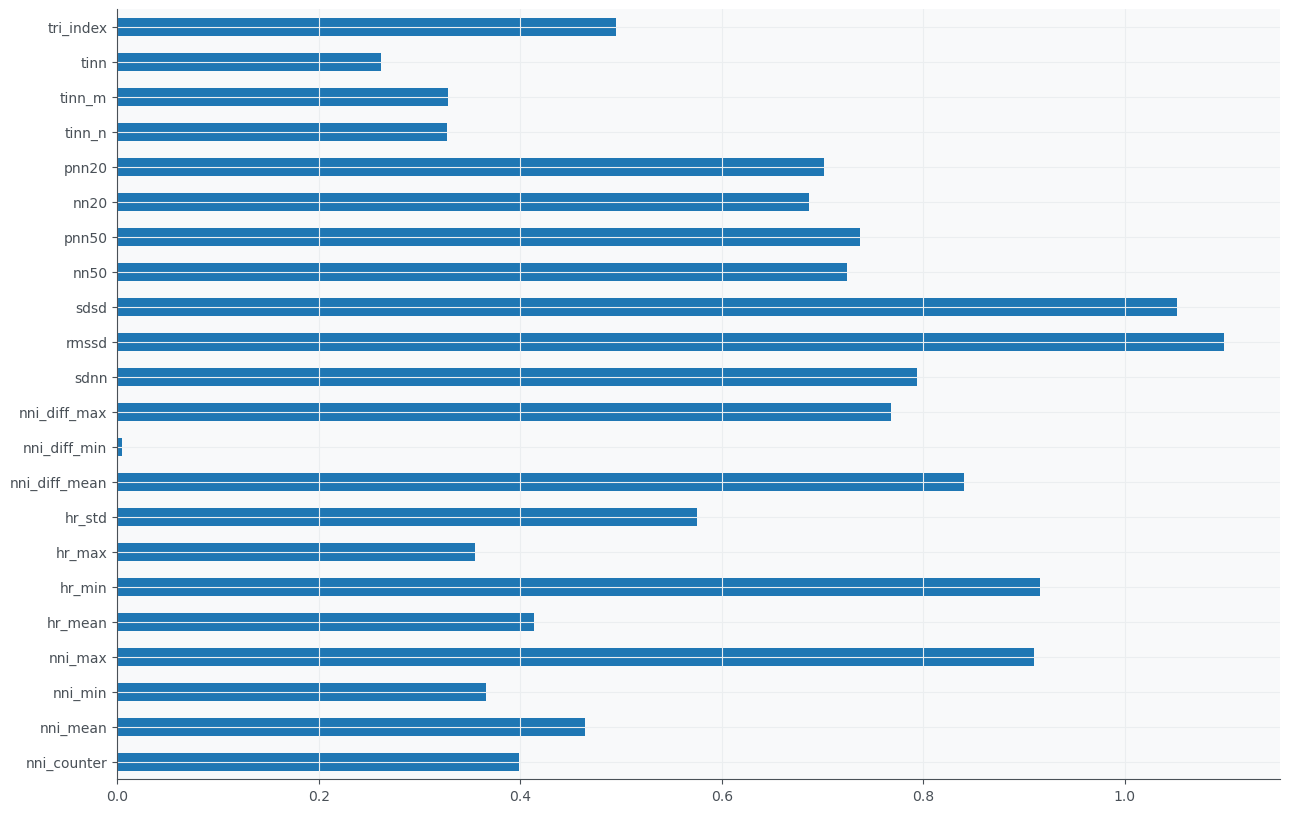

In [41]:
from sklearn.feature_selection import mutual_info_classif


# Asumiendo que X y y ya están definidos como se discutió anteriormente
X_new = mutual_info_classif(X, Y)

# Ajusta las etiquetas de las columnas para que coincidan con las dimensiones de X
# Aquí, utilizamos df.columns[1:-1] para excluir tanto la primera como la última columna de df
feat_imp = pd.Series(X_new, df.columns[1:len(df.columns)-1])

plt.figure(figsize=(15, 10))
# Graficar la importancia de las características
feat_imp.plot(kind='barh')
plt.show()

##### El código calcula un umbral de importancia como el valor medio entre 0.2 y 0.3 (0.25) y luego selecciona las características de un DataFrame df que tienen valores de importancia mayores a este umbral. Las características seleccionadas se imprimen y también se crea un nuevo DataFrame features_df_info_gain que solo contiene estas características seleccionadas.

In [42]:
# Calcular el valor medio entre 0.2 y 0.3
umbral = (0.2 + 0.3) / 2

# Filtrar las características con valores mayores al umbral
selected_features = df.columns[np.where(X_new > umbral)].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con valor mayor a", umbral, ":", selected_features)
features_df_info_gain = df[selected_features]

Características seleccionadas con valor mayor a 0.25 : ['sujeto', 'nni_counter', 'nni_mean', 'nni_min', 'nni_max', 'hr_mean', 'hr_min', 'hr_max', 'hr_std', 'nni_diff_min', 'nni_diff_max', 'sdnn', 'rmssd', 'sdsd', 'nn50', 'pnn50', 'nn20', 'pnn20', 'tinn_n', 'tinn_m', 'tinn']


##### El código prepara un conjunto de datos para ser utilizado en un modelo de machine learning. Selecciona un conjunto de características (X) basadas en su ganancia de información y convierte las etiquetas categóricas (Y) en etiquetas numéricas (y_encode) usando LabelEncoder.

In [43]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Crear el objeto OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Bajo', 'Moderado', 'Grave']])

# Ajustar y transformar los datos asegurándose de que 'Y' sea un array 2D y luego aplanar el resultado
Y_2D = Y.values.reshape(-1, 1)  # Convertir Y a un array 2D
data_encoded_2D = encoder.fit_transform(Y_2D)  # Ajustar y transformar
data_encoded = data_encoded_2D.ravel()  # Aplanar el resultado a 1D

print(data_encoded)


[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 2. 0. 0. 0. 2. 2. 2.]


## Classification

##### Este código prepara un conjunto de clasificadores de aprendizaje automático para ser utilizados en tareas de clasificación. Cada clasificador está configurado con parámetros específicos y se alista junto a su nombre descriptivo. Estos clasificadores pueden ser evaluados y comparados en su desempeño en un conjunto de datos específico, lo cual es una práctica común en proyectos de ciencia de datos y aprendizaje automático para seleccionar el modelo más adecuado para una tarea dada.

In [44]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


##### El código implementa una función de validación cruzada que evalúa el rendimiento de modelos de aprendizaje automático utilizando 5-fold cross-validation. Calcula las métricas de precisión, recall, puntaje F1 y exactitud para cada modelo y pliegue, y luego promedia estos valores para obtener una medida del rendimiento general del modelo. Posteriormente, aplica esta función a una serie de modelos para comparar su rendimiento y compila los resultados en un DataFrame de Pandas, facilitando la comparación y el análisis de los modelos evaluados.

In [45]:
def validacion_cruzada(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracies = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        X_test_np = X_test.values
        y_pred = model.predict(X_test_np)

        precision = precision_score(y_test, y_pred, average='weighted')
        precision_scores.append(precision)

        recall = recall_score(y_test, y_pred, average='weighted')
        recall_scores.append(recall)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores), np.mean(accuracies)

resultados = []

for nombre, modelo in zip(names, classifiers):
    precision, recall, f1, accuracy = validacion_cruzada(model=modelo, X=X, y=data_encoded)
    resultados.append({"nombre": nombre, "precision": precision, "recall": recall, "f1_score": f1, "accuracy": accuracy})

df_resultados = pd.DataFrame(resultados)

In [46]:
df_resultados

,nombre,precision,recall,f1_score,accuracy
0,Nearest Neighbors,0.937917,0.900000,0.899425,0.900000
1,Linear SVM,0.922222,0.912500,0.913925,0.912500
2,RBF SVM,0.053260,0.222059,0.085087,0.222059
3,Gaussian Process,0.116541,0.334559,0.171621,0.334559
4,Decision Tree,0.990588,0.988235,0.988354,0.988235
5,Random Forest,0.915837,0.900735,0.904306,0.900735
6,Neural Net,0.536418,0.600000,0.557986,0.600000
7,AdaBoost,0.989583,0.987500,0.987500,0.987500
8,Naive Bayes,0.907083,0.875000,0.880335,0.875000
9,QDA,0.380948,0.417647,0.332718,0.417647


### Entrenamiendo de clasificadores

##### Este código está relacionado con el entrenamiento de modelos de aprendizaje automático utilizando scikit-learn, una biblioteca popular de Python para la ciencia de datos y el aprendizaje automático. Se están entrenando dos modelos diferentes: un clasificador AdaBoost y un árbol de decisión

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)
model1 = AdaBoostClassifier()
model1.fit(X_train, y_train)


AdaBoostClassifier()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

##### Este código es una secuencia completa para evaluar el rendimiento de un modelo de clasificación en aprendizaje automático. Comienza con la obtención de predicciones, seguido por el cálculo y visualización de la matriz de confusión, la evaluación de métricas clave como el F1 Score, la sensibilidad y la exactitud, y termina con el cálculo de la especificidad para cada clase. Este tipo de análisis es fundamental para entender en detalle cómo está funcionando el modelo, identificar sus fortalezas y debilidades, y guiar los esfuerzos para mejorar el modelo en futuras iteraciones.

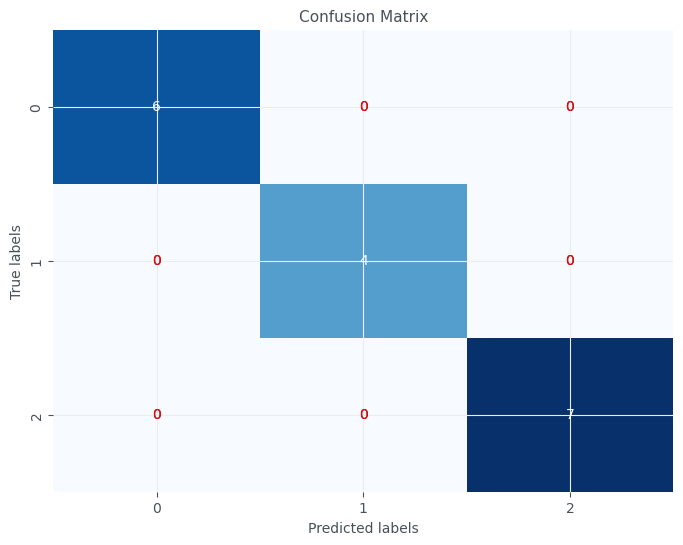

F1 Score: 1.0
Sensibilidad (Recall): 1.0
Especificidad por clase: [1.0, 1.0, 1.0]
Exactitud: 1.0


In [51]:
# Obtener predicciones del modelo
y_pred = model1.predict(X_test)

# Calcular la matriz de confusión multiclase
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas adicionales
f1 = f1_score(y_test, y_pred, average='weighted')
sensibilidad = recall_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)

# Calcular especificidad para cada clase
especificidad = []
for i in range(len(conf_matrix)):
    true_negative = np.sum(np.delete(np.delete(conf_matrix, i, 0), i, 1))
    total_negative = np.sum(np.delete(conf_matrix, i, 0))
    especificidad.append(true_negative / total_negative)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Resaltar los valores donde el modelo se confundió
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center", color="red")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas
print("F1 Score:", f1)
print("Sensibilidad (Recall):", sensibilidad)
print("Especificidad por clase:", especificidad)
print("Exactitud:", exactitud)

##### Los resultados mostrados indican un rendimiento perfecto del modelo de clasificación en todas las métricas evaluadas: F1 Score, Sensibilidad (Recall), Especificidad por clase y Exactitud, todos con un valor de 1.0. Esto sugiere que el modelo ha predicho correctamente todas las clases sin cometer ningún error. Sin embargo, en la práctica, es muy raro ver un modelo con un rendimiento perfecto en todas estas métricas, especialmente en conjuntos de datos complejos o con variabilidad significativa. Por lo tanto, estos resultados podrían indicar un escenario idealizado, un sobreajuste al conjunto de datos de entrenamiento, o que el conjunto de datos para la evaluación era relativamente simple o pequeño.

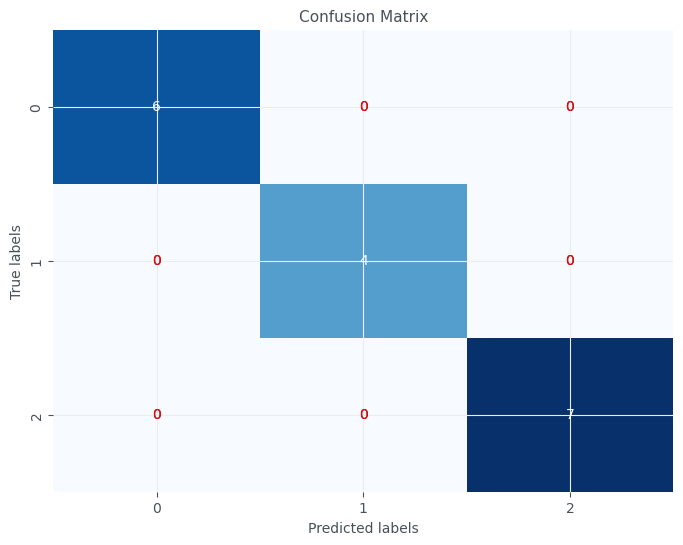

F1 Score: 1.0
Sensibilidad (Recall): 1.0
Especificidad por clase: [1.0, 1.0, 1.0]
Exactitud: 1.0


In [52]:
# Obtener predicciones del modelo
y_pred = model2.predict(X_test)

# Calcular la matriz de confusión multiclase
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas adicionales
f1 = f1_score(y_test, y_pred, average='weighted')
sensibilidad = recall_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)

# Calcular especificidad para cada clase
especificidad = []
for i in range(len(conf_matrix)):
    true_negative = np.sum(np.delete(np.delete(conf_matrix, i, 0), i, 1))
    total_negative = np.sum(np.delete(conf_matrix, i, 0))
    especificidad.append(true_negative / total_negative)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Resaltar los valores donde el modelo se confundió
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center", color="red")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas
print("F1 Score:", f1)
print("Sensibilidad (Recall):", sensibilidad)
print("Especificidad por clase:", especificidad)
print("Exactitud:", exactitud)

## conclusiones

#### A través de este chat, hemos abarcado una amplia gama de temas técnicos, proporcionando soluciones y explicaciones detalladas para problemas específicos de programación y análisis de datos. Hemos visto la importancia de validar rutas y tipos de archivos al trabajar con sistemas de archivos, las capacidades de pydub para el procesamiento de audio, cómo transformar datos de intervalos RR en marcas de tiempo significativas, la utilidad de librosa y scipy en el análisis de audio, y la evaluación detallada de modelos de clasificación usando métricas clave y visualizaciones. Abordamos la importancia de un enfoque metódico y la comprensión profunda de las herramientas y técnicas utilizadas en la ciencia de datos y la programación para resolver problemas, analizar datos y mejorar los modelos de aprendizaje automático.